# Person detection and tracking.

In [ ]:
import cv2
import os

# Open the video file
video_capture = cv2.VideoCapture('cctv_footage.mp4')

# Create a directory to save the frames as image files
output_directory = 'frames_output'
os.makedirs(output_directory, exist_ok=True)

frame_count = 0

while True:
    ret, frame = video_capture.read()

    if not ret:
        break

    frame_count += 1

    # Save the frame as an image file in the output directory
    frame_filename = os.path.join(output_directory, f'frame_{frame_count:04d}.jpg')
    cv2.imwrite(frame_filename, frame)

video_capture.release()

# Optionally, clean up and release any resources
cv2.destroyAllWindows()


In [ ]:
#Importing important libraries
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import numpy as np


In [ ]:
#importing pre-defined model FR-CNN
model = fasterrcnn_resnet50_fpn(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 140MB/s]


In [ ]:
# Load the image for inference
image_path = '/content/frames_output/frame_0102.jpg'  # Replace with the actual filename of your uploaded image
image = Image.open(image_path)
image_tensor = F.to_tensor(image).unsqueeze(0)

In [ ]:
# Perform object detection with the model
model.eval()
with torch.no_grad():
    prediction = model(image_tensor)

In [ ]:
prediction

[{'boxes': tensor([[ 639.7449,   81.0855,  876.9046,  713.7333],
          [ 440.6149,  236.4088,  552.4146,  567.3589],
          [ 232.3360,  278.4751,  318.6636,  501.8885],
          [  79.3413,  282.1282,  159.3518,  497.0714],
          [ 157.6462,  286.5741,  232.8115,  499.4828],
          [ 542.1927,  250.3396,  636.0419,  555.7303],
          [ 858.5933,  238.0497,  953.5068,  532.9332],
          [1056.7401,  231.6800, 1237.1189,  575.1089],
          [ 313.6850,  326.1731,  348.2287,  433.2420],
          [1042.9790,  242.2769, 1132.6093,  542.2216],
          [ 936.3778,  286.9847, 1025.4740,  526.5353],
          [ 354.8648,  339.5428,  386.0841,  429.0385],
          [1135.0684,  271.8510, 1221.0046,  391.9699],
          [ 398.6107,  283.5329,  458.7260,  475.6996],
          [ 376.6459,  299.1007,  388.3672,  322.5925],
          [ 207.3333,  399.4250,  228.8495,  457.2222],
          [ 611.4238,  323.3267,  649.0130,  491.0971],
          [ 917.4692,  252.4149,  972.3

In [ ]:
# Define the list of COCO class labels
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
    'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack',
    'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard',
    'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife',
    'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot',
    'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
    'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [ ]:
# Get the predicted class labels and boxes
labels = prediction[0]['labels']
boxes = prediction[0]['boxes']

In [ ]:
# Filter for "person" class (class ID 1)
person_boxes = [boxes[i] for i in range(len(boxes)) if labels[i] == 1]

In [ ]:
# Draw bounding boxes around persons
image_array = np.array(image)
for box in person_boxes:
    box = [int(coord) for coord in box]
    cv2.rectangle(image_array, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)


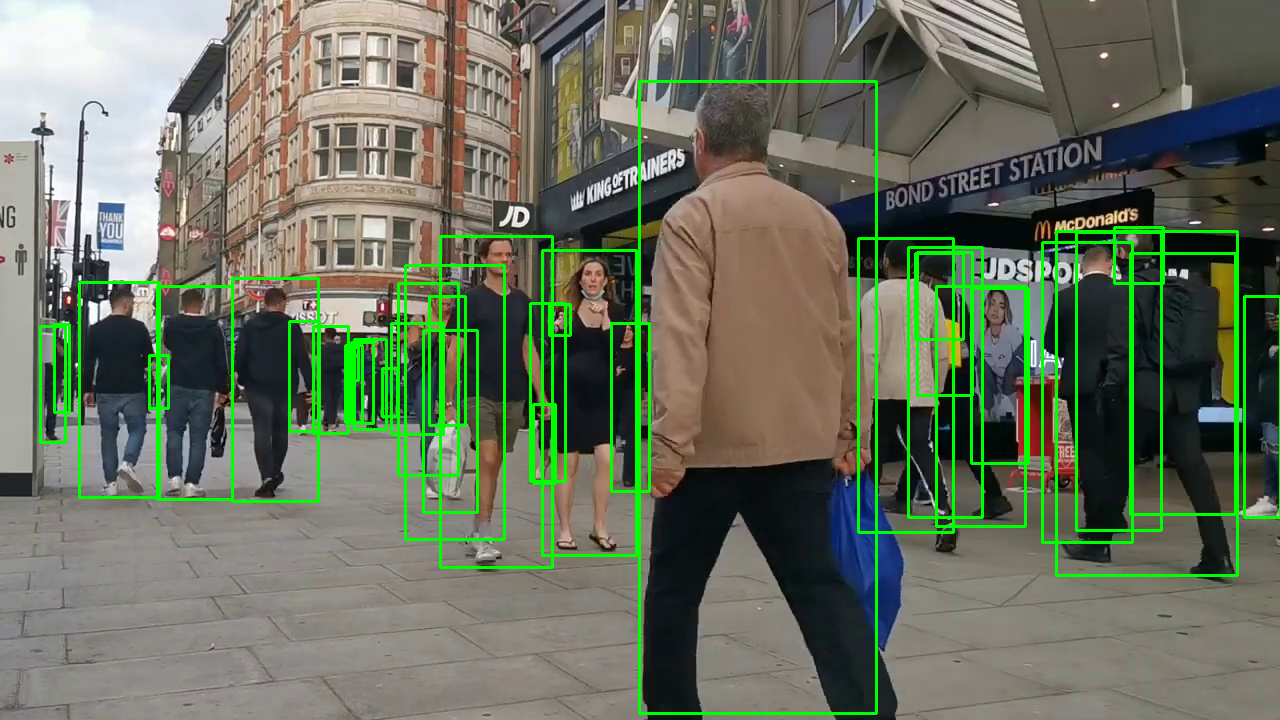

In [ ]:
# Display the result
Image.fromarray(image_array)